In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostRegressor
import warnings
warnings.filterwarnings("ignore")

Read data

In [2]:
df = pd.read_csv('Car details v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


**Shape of data**

In [3]:
df.shape

(8128, 13)

In [4]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

**Data Cleaning**

**Null values**

In [5]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

**Convert Mileage**

In [6]:
kmkg = 0
kmpl = 0
other = 0

for i in df.mileage:
  if str(i).endswith("kmpl"):
    kmpl+= 1
  elif str(i).endswith("km/kg"):
    kmkg+=1
  else :
    other+=1

print("Mileage in kmpl : ", kmpl)
print("Mileage in km/kg : ", kmkg)
print("Mileage in any othe unit : ", other)

Mileage in kmpl :  7819
Mileage in km/kg :  88
Mileage in any othe unit :  221


In [7]:
for i in range(0, len(df.mileage)):
  if str(df.mileage[i]).endswith('km/kg'):
    df.mileage[i] = df.mileage[i][:-6]
    df.mileage[i] = float(df.mileage[i]) * 1.4
  elif str(df.mileage[i]).endswith('kmpl'):
    df.mileage[i] = df.mileage[i][:-6]

In [8]:
type(df.mileage[0])

str

In [9]:
df['mileage'] = df['mileage'].astype('float')

In [10]:
df['mileage']

0       23.0
1       21.1
2       17.0
3       23.0
4       16.0
        ... 
8123    18.0
8124    16.0
8125    19.0
8126    23.5
8127    23.5
Name: mileage, Length: 8128, dtype: float64

In [11]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


**Convert engine CC to float**

In [12]:
df['engine'].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [13]:
df['engine']

0       1248 CC
1       1498 CC
2       1497 CC
3       1396 CC
4       1298 CC
         ...   
8123    1197 CC
8124    1493 CC
8125    1248 CC
8126    1396 CC
8127    1396 CC
Name: engine, Length: 8128, dtype: object

In [14]:
for i in range(0, len(df['engine'])):
  if str(df['engine'][i]).endswith('CC'):
    df['engine'][i] = df['engine'][i][:-3]

In [15]:
df['engine'] = df['engine'].astype('float')
df['engine']

0       1248.0
1       1498.0
2       1497.0
3       1396.0
4       1298.0
         ...  
8123    1197.0
8124    1493.0
8125    1248.0
8126    1396.0
8127    1396.0
Name: engine, Length: 8128, dtype: float64

**Convert max power from bhp to float**

In [16]:
df['max_power'].unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp',
       '88.5 bhp', '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp',
       '88.8 bhp', '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp',
       '34.2 bhp', '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp',
       '138.03 bhp', '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp',
       '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp',
       '175.56 bhp', '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp',
       '155 bhp', '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp',
       '126.2 bhp', '98.

In [17]:
for i in range(len(df.max_power)):
  if str(df['max_power'][i]).endswith('bhp'):
    df['max_power'][i] = df['max_power'][i][:-4]
df['max_power']

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power, Length: 8128, dtype: object

In [18]:
df['max_power'].unique()

array(['74', '103.52', '78', '90', '88.2', '81.86', '57.5', '37', '67.1',
       '68.1', '108.45', '60', '73.9', nan, '67', '82', '88.5', '46.3',
       '88.73', '64.1', '98.6', '88.8', '83.81', '83.1', '47.3', '73.8',
       '34.2', '35', '81.83', '40.3', '121.3', '138.03', '160.77',
       '117.3', '116.3', '83.14', '67.05', '168.5', '100', '120.7',
       '98.63', '175.56', '103.25', '171.5', '100.6', '174.33', '187.74',
       '170', '78.9', '88.76', '86.8', '108.495', '108.62', '93.7',
       '103.6', '98.59', '189', '67.04', '68.05', '58.2', '82.85',
       '81.80', '73', '120', '94.68', '160', '65', '155', '69.01',
       '126.32', '138.1', '83.8', '126.2', '98.96', '62.1', '86.7', '188',
       '214.56', '177', '280', '148.31', '254.79', '190', '177.46', '204',
       '141', '117.6', '241.4', '282', '150', '147.5', '108.5', '103.5',
       '183', '181.04', '157.7', '164.7', '91.1', '400', '68', '75',
       '85.8', '87.2', '53', '118', '103.2', '83', '84', '58.16',
       '147.

In [19]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


In [20]:
for i in range(0, len(df)):
  try:
      p = float(df['max_power'][i])
  except ValueError:
      print("wrong :::   ", i)
  

wrong :::    4933


In [21]:
df.drop(index=4933, inplace=True)

In [22]:
df['max_power'] = df['max_power'].astype('float')
df['max_power']

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 8127, dtype: float64

**Feel missing value using data analysis**

<AxesSubplot:xlabel='max_power', ylabel='Density'>

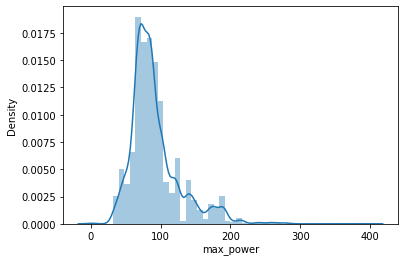

In [23]:
sns.distplot(df['max_power'])

In [24]:
df['max_power'].skew()

1.6212607481144399

In [25]:
df['max_power'].fillna(df['max_power'].median(), inplace=True)

In [26]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [27]:
df['torque'].unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', nan, '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
       '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm',
       '400Nm@ 1750-3000rpm', '400Nm@ 1400-2800rpm',
       '200Nm@ 1750-3000rp

In [28]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power          0
torque           221
seats            221
dtype: int64

<AxesSubplot:xlabel='mileage', ylabel='Density'>

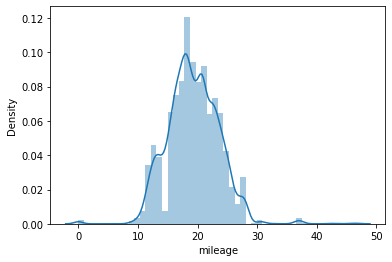

In [29]:
sns.distplot(df['mileage'])

In [30]:
df['mileage'].skew()

0.33166551104244363

In [31]:
df['mileage'].fillna(df['mileage'].mean(), inplace=True)

<AxesSubplot:xlabel='engine', ylabel='Density'>

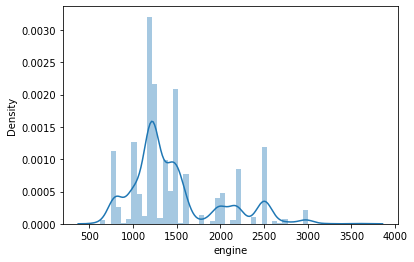

In [32]:
sns.distplot(df['engine'])

In [33]:
df['engine'].skew()

1.1353585465845377

In [34]:
print(df['engine'].mean())
print(df['engine'].median())

1458.7088287376675
1248.0


In [35]:
df['engine'].fillna(df['engine'].median(), inplace=True)

In [36]:
df['max_power'].astype('float')

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 8127, dtype: float64

In [37]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


<AxesSubplot:xlabel='seats', ylabel='Density'>

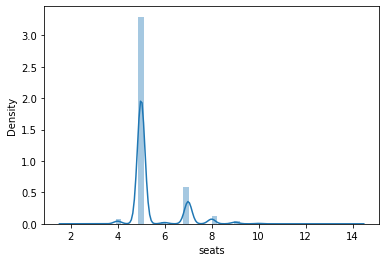

In [38]:
sns.distplot(df['seats'])

In [39]:
df['seats'].skew()

1.9710520627238781

In [40]:
df['seats'].fillna(df['seats'].median(), inplace=True)

In [41]:
df.drop(['torque', 'name'],axis=1,  inplace=True)

In [42]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.20,5.0


In [43]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8127.000000,8.127000e+03,8.127000e+03,8127.000000,8127.000000,8127.000000,8127.000000
mean,2013.805709,6.383405e+05,6.981580e+04,19.277651,1452.978959,91.266122,5.405070
std,4.041597,8.062792e+05,5.655304e+04,4.223518,498.174073,35.378415,0.948496
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.700000,1197.000000,68.100000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.000000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.000000,1582.000000,101.500000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,46.816000,3604.000000,400.000000,14.000000


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

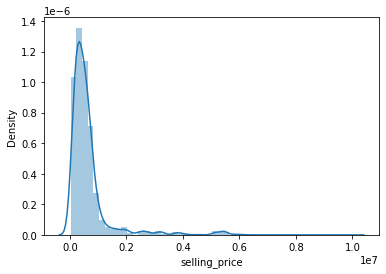

In [44]:
sns.distplot(df['selling_price'])

In [45]:
df['selling_price'].skew()

4.19343191242621

<AxesSubplot:xlabel='km_driven', ylabel='Density'>

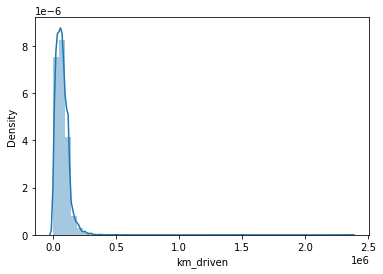

In [46]:
sns.distplot(df['km_driven'])

In [47]:
df['km_driven'].skew()

11.170988486007715

In [48]:
df = df[df['mileage'] != 0]

In [49]:
df = df[df['max_power'] != 0]

In [50]:
df.shape

(8104, 11)

In [51]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.20,5.0


**Exploratory data analysis**

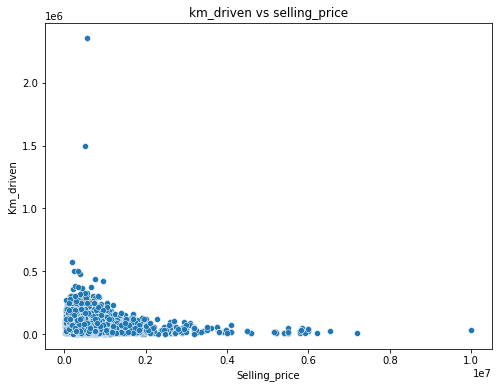

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='selling_price', y='km_driven', data=df)
plt.title("km_driven vs selling_price")
plt.xlabel("Selling_price")
plt.ylabel("Km_driven")
plt.show()

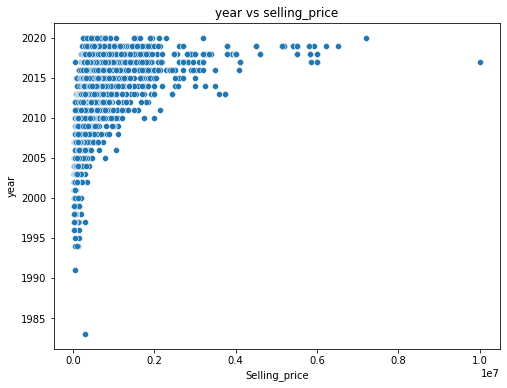

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='selling_price', y='year', data=df)
plt.title("year vs selling_price")
plt.xlabel("Selling_price")
plt.ylabel("year")
plt.show()

In [54]:
df['fuel'].value_counts(normalize=True)

Diesel    0.541955
Petrol    0.446446
CNG       0.006910
LPG       0.004689
Name: fuel, dtype: float64

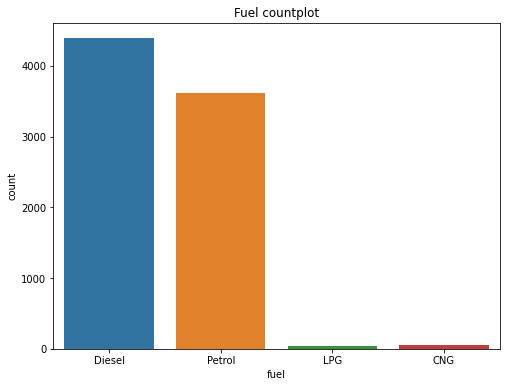

In [55]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fuel', data=df)
plt.title("Fuel countplot")
plt.show()

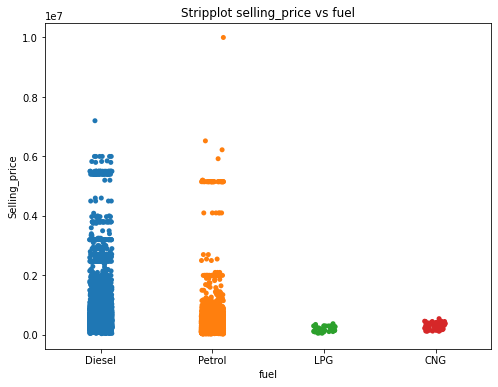

In [56]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='fuel', y='selling_price', data=df)
plt.title("Stripplot selling_price vs fuel")
plt.ylabel("Selling_price")
plt.xlabel("fuel")
plt.show()

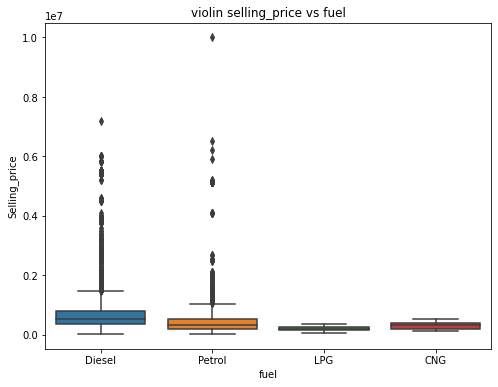

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title("violin selling_price vs fuel")
plt.ylabel("Selling_price")
plt.xlabel("fuel")
plt.show()

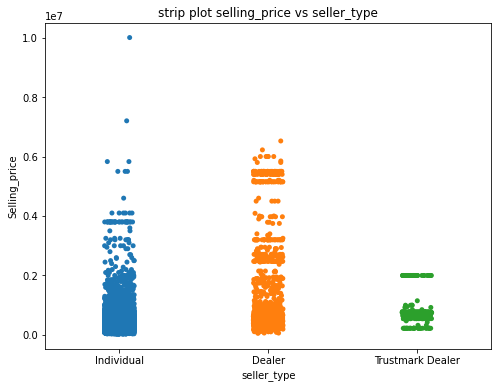

In [58]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='seller_type', y='selling_price', data=df)
plt.title("strip plot selling_price vs seller_type")
plt.ylabel("Selling_price")
plt.xlabel("seller_type")
plt.show()

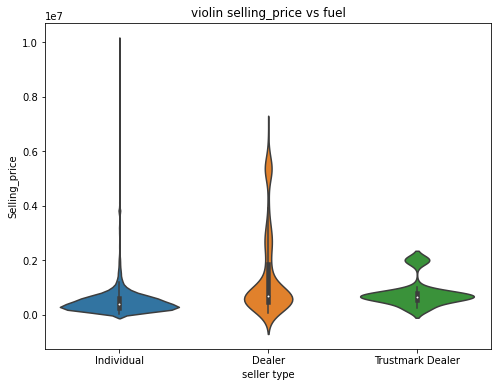

In [59]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='seller_type', y='selling_price', data=df)
plt.title("violin selling_price vs fuel")
plt.ylabel("Selling_price")
plt.xlabel("seller type")
plt.show()

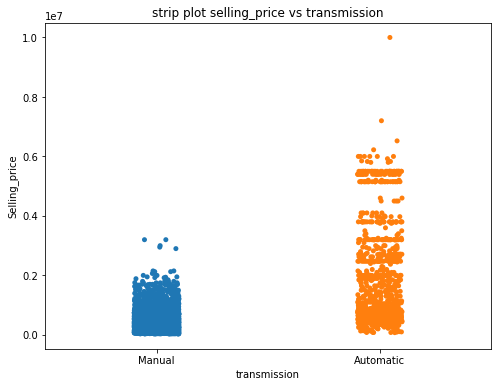

In [60]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='transmission', y='selling_price', data=df)
plt.title("strip plot selling_price vs transmission")
plt.ylabel("Selling_price")
plt.xlabel("transmission")
plt.show()

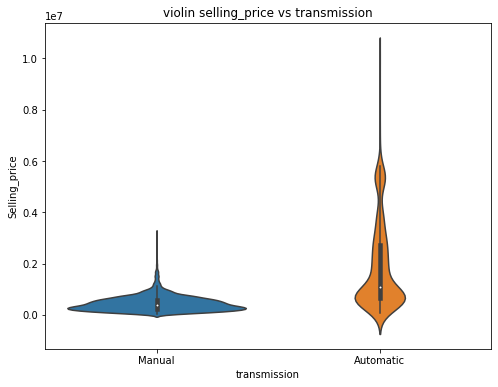

In [61]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='transmission', y='selling_price', data=df)
plt.title("violin selling_price vs transmission")
plt.ylabel("Selling_price")
plt.xlabel("transmission")
plt.show()

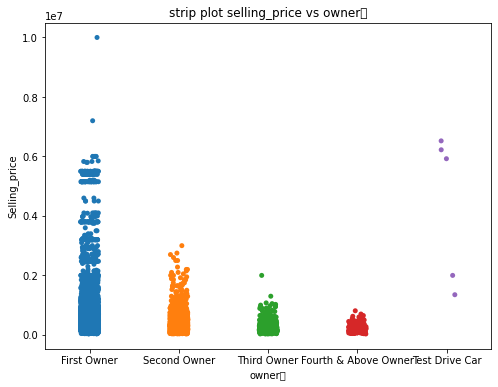

In [62]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='owner', y='selling_price', data=df)
plt.title("strip plot selling_price vs owner	")
plt.ylabel("Selling_price")
plt.xlabel("owner	")
plt.show()

<AxesSubplot:xlabel='mileage', ylabel='Density'>

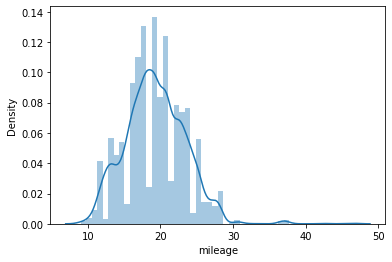

In [63]:
sns.distplot(df['mileage'])

In [64]:
df['mileage'].skew()

0.5421851816787182

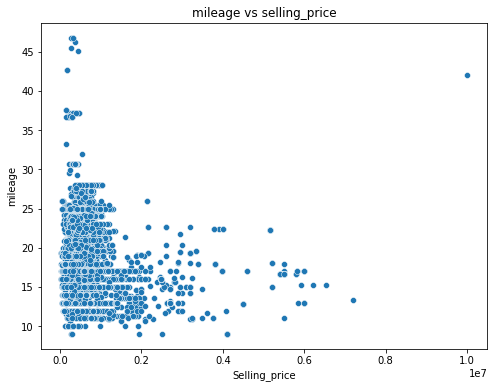

In [65]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='selling_price', y='mileage', data=df)
plt.title("mileage vs selling_price")
plt.xlabel("Selling_price")
plt.ylabel("mileage")
plt.show()

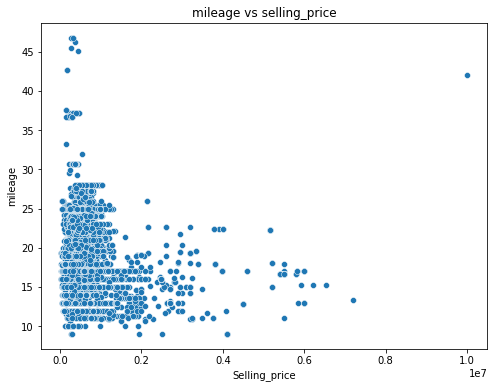

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='selling_price', y='mileage', data=df)
plt.title("mileage vs selling_price")
plt.xlabel("Selling_price")
plt.ylabel("mileage")
plt.show()

<AxesSubplot:xlabel='engine', ylabel='Density'>

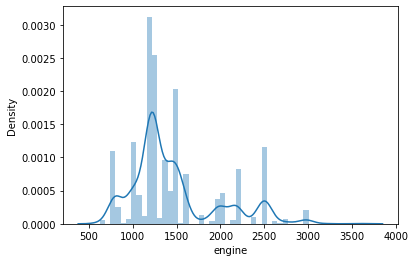

In [67]:
sns.distplot(df['engine'])

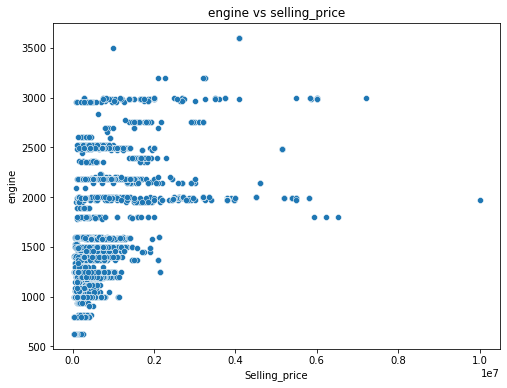

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='selling_price', y='engine', data=df)
plt.title("engine vs selling_price")
plt.xlabel("Selling_price")
plt.ylabel("engine")
plt.show()

<AxesSubplot:xlabel='max_power', ylabel='Density'>

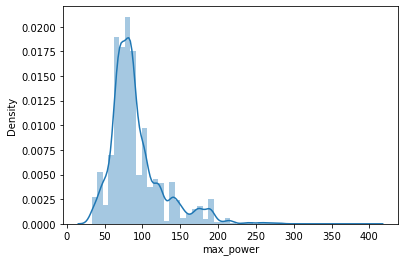

In [69]:
sns.distplot(df['max_power'])

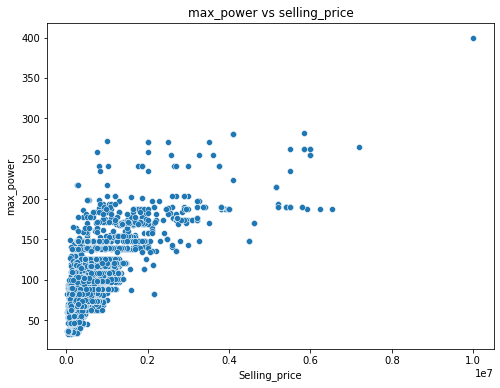

In [70]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='selling_price', y='max_power', data=df)
plt.title("max_power vs selling_price")
plt.xlabel("Selling_price")
plt.ylabel("max_power")
plt.show()

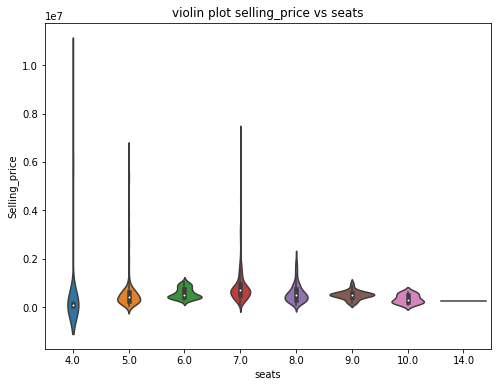

In [71]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='seats', y='selling_price', data=df)
plt.title("violin plot selling_price vs seats")
plt.ylabel("Selling_price")
plt.xlabel("seats")
plt.show()

In [72]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.20,5.0


In [73]:
df['selling_price'] = np.log(df['selling_price'])
df['km_driven'] = np.log(df['km_driven'])

In [74]:
df['year'].min()

1983

In [75]:
df['year'] = df['year'] - 1983

In [76]:
df.dtypes

year               int64
selling_price    float64
km_driven        float64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

<AxesSubplot:>

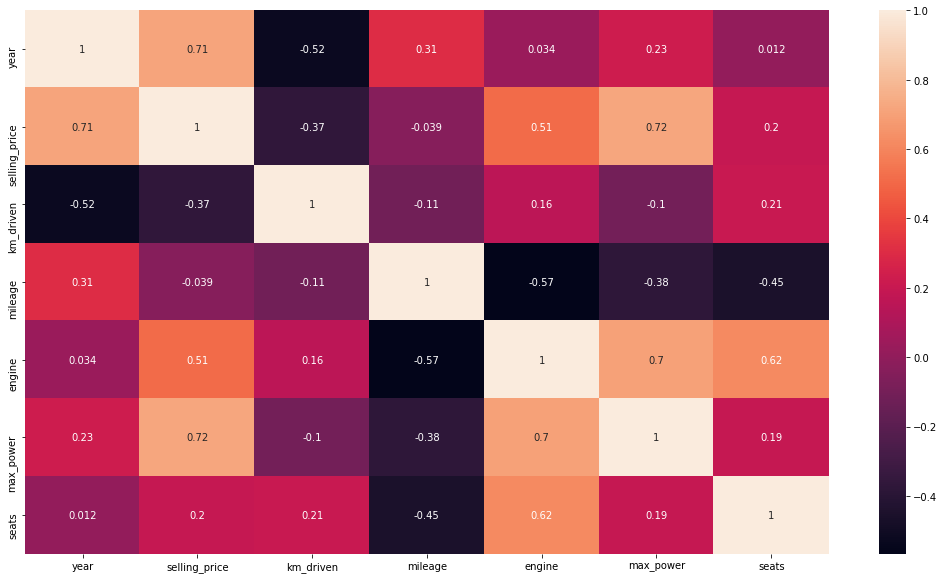

In [77]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True)

In [78]:
df.corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.712351,-0.524037,0.307831,0.034347,0.225075,0.012117
selling_price,0.712351,1.000000,-0.369060,-0.039493,0.514119,0.718722,0.196754
km_driven,-0.524037,-0.369060,1.000000,-0.114090,0.160206,-0.103711,0.206863
mileage,0.307831,-0.039493,-0.114090,1.000000,-0.567258,-0.375267,-0.451270
engine,0.034347,0.514119,0.160206,-0.567258,1.000000,0.704944,0.617391
max_power,0.225075,0.718722,-0.103711,-0.375267,0.704944,1.000000,0.194570
seats,0.012117,0.196754,0.206863,-0.451270,0.617391,0.194570,1.000000


In [79]:
df = pd.get_dummies(df, drop_first=True)

In [80]:
df.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,31,13.017003,11.887931,23.0,1248.0,74.00,5.0,1,0,0,1,0,1,0,0,0,0
1,31,12.821258,11.695247,21.1,1498.0,103.52,5.0,1,0,0,1,0,1,0,1,0,0
2,23,11.970350,11.849398,17.0,1497.0,78.00,5.0,0,0,1,1,0,1,0,0,0,1
3,27,12.323856,11.751942,23.0,1396.0,90.00,5.0,1,0,0,1,0,1,0,0,0,0
4,24,11.775290,11.695247,16.0,1298.0,88.20,5.0,0,0,1,1,0,1,0,0,0,0


**Split data into train and test**

In [81]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6483, 16), (1621, 16), (6483,), (1621,))

In [83]:
X_train.head()

,year,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
7275,26,11.050890,19.277651,1248.0,82.0,5.0,0,0,1,1,0,1,0,0,0,1
2076,30,11.407565,22.700000,796.0,47.3,5.0,0,0,1,1,0,1,0,0,0,0
4293,33,10.819778,18.000000,1497.0,117.3,5.0,0,0,1,1,0,0,0,0,0,0
6138,29,10.311549,15.000000,1396.0,70.0,5.0,0,0,1,0,0,1,0,0,0,0
5412,29,10.308953,17.000000,1197.0,85.8,5.0,0,0,1,1,0,1,0,0,0,0


In [84]:
X_train_columns = X_train.columns

In [85]:
X_train.head()

,year,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
7275,26,11.050890,19.277651,1248.0,82.0,5.0,0,0,1,1,0,1,0,0,0,1
2076,30,11.407565,22.700000,796.0,47.3,5.0,0,0,1,1,0,1,0,0,0,0
4293,33,10.819778,18.000000,1497.0,117.3,5.0,0,0,1,1,0,0,0,0,0,0
6138,29,10.311549,15.000000,1396.0,70.0,5.0,0,0,1,0,0,1,0,0,0,0
5412,29,10.308953,17.000000,1197.0,85.8,5.0,0,0,1,1,0,1,0,0,0,0


**Model building**

In [86]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
y_pred = lr.predict(X_test)
print("mean squared error : ", mean_squared_error(y_test, y_pred) )
print("r2 score : ", r2_score(y_test, y_pred) )
print("Ajusted r2 score : ", 1 - ( ( 1-r2_score(y_test,y_pred)**2 ) * (1621-1) / (1621-16-1) ) )
print("Mean absolute error : ", mean_absolute_error(y_test, y_pred))
lr.coef_

mean squared error :  0.09223622219003229
r2 score :  0.8737938284820179
Ajusted r2 score :  0.7611567086054143
Mean absolute error :  0.23277908857925064


array([ 1.02222180e-01, -6.76984099e-02,  1.24378798e-02,  2.39427053e-04,
        1.01114274e-02,  3.28872458e-02,  3.47582468e-01,  2.57883402e-01,
        1.67016994e-01, -1.14100847e-01,  9.64990266e-03, -1.79263404e-01,
       -1.35831976e-01, -6.53437378e-02,  6.74533177e-01, -9.35598421e-02])

In [87]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)
y_pred = dt.predict(X_test)
print("mean squared error : ", mean_squared_error(y_test, y_pred) )
print("r2 score : ", r2_score(y_test, y_pred) )
print("Ajusted r2 score : ", 1 - ( ( 1-r2_score(y_test,y_pred)**2 ) * (1621-1) / (1621-16-1) ) )
print("Mean absolute error : ", mean_absolute_error(y_test, y_pred))
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
# plot_tree(dt, filled = True);
# fig.savefig('imagename.png')

mean squared error :  0.08365702864952647
r2 score :  0.8855326784235115
Ajusted r2 score :  0.7820151881425109
Mean absolute error :  0.18408104261728195


In [88]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
print("mean squared error : ", mean_squared_error(y_test, y_pred) )
print("r2 score : ", r2_score(y_test, y_pred) )
print("Ajusted r2 score : ", 1 - ( ( 1-r2_score(y_test,y_pred)**2 ) * (1621-1) / (1621-16-1) ) )
print("Mean absolute error : ", mean_absolute_error(y_test, y_pred))
rf.feature_importances_

mean squared error :  0.05215407184938173
r2 score :  0.9286379517623441
Ajusted r2 score :  0.8609955621162381
Mean absolute error :  0.15050238517951856


array([4.49545393e-01, 2.84131762e-02, 2.14257428e-02, 6.09802457e-02,
       4.14452572e-01, 9.64131271e-03, 3.31225144e-03, 1.49667035e-04,
       1.48089382e-03, 1.77255224e-03, 7.64674316e-05, 2.10401135e-03,
       1.00121765e-03, 3.69336376e-03, 1.05093449e-05, 1.94062340e-03])

Text(0, 0.5, 'Mean decrease in impurity')

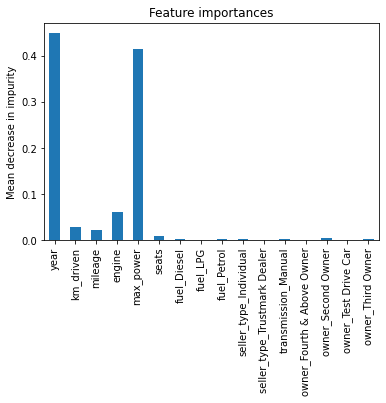

In [89]:
ig, ax = plt.subplots()
std = np.std([rf.feature_importances_ for tree in rf.estimators_], axis=0)
pd.Series(rf.feature_importances_, index=X_train.columns).plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

In [90]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print("mean squared error : ", mean_squared_error(y_test, y_pred) )
print("r2 score : ", r2_score(y_test, y_pred) )
print("Ajusted r2 score : ", 1 - ( ( 1-r2_score(y_test,y_pred)**2 ) * (1621-1) / (1621-16-1) ) )
print("Mean absolute error : ", mean_absolute_error(y_test, y_pred))
ada.feature_importances_

mean squared error :  0.11195226814213019
r2 score :  0.8468165020260371
Ajusted r2 score :  0.7142762248926767
Mean absolute error :  0.264998059162641


array([0.43037645, 0.03061737, 0.00379053, 0.09710913, 0.32283313,
       0.01609273, 0.00157524, 0.        , 0.00301189, 0.        ,
       0.        , 0.09459353, 0.        , 0.        , 0.        ,
       0.        ])

Text(0, 0.5, 'Mean decrease in impurity')

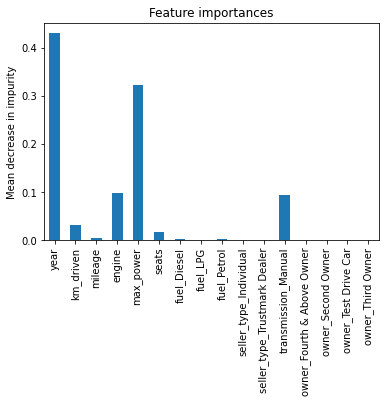

In [91]:
ig, ax = plt.subplots()
std = np.std([ada.feature_importances_ for tree in ada.estimators_], axis=0)
pd.Series(ada.feature_importances_, index=X_train.columns).plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

In [92]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

gbr = GradientBoostingRegressor()
# gbr.set_params(**params)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
print("Root mean squared error : ", mean_squared_error(y_test, y_pred) )
print("r2 score : ", r2_score(y_test, y_pred) )
print("Ajusted r2 score : ", 1 - ( ( 1-r2_score(y_test,y_pred)**2 ) * (1621-1) / (1621-16-1) ) )
print("Mean absolute error : ", mean_absolute_error(y_test, y_pred))

Root mean squared error :  0.061940981139425984
r2 score :  0.9152465928887612
Ajusted r2 score :  0.836057137024356
Mean absolute error :  0.17911374951626569


In [93]:
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("mean squared error : ", mean_squared_error(y_test, y_pred) )
print("r2 score : ", r2_score(y_test, y_pred) )
print("Ajusted r2 score : ", 1 - ( ( 1-r2_score(y_test,y_pred)**2 ) * (1621-1) / (1621-16-1) ) )
print("Mean absolute error : ", mean_absolute_error(y_test, y_pred))

mean squared error :  0.05070979497601174
r2 score :  0.9306141456097509
Ajusted r2 score :  0.8647064554704027
Mean absolute error :  0.14643752476194705


**Overall, XGB regressor is the best performing model with:
MSE: 0.0507
Ad. R2 score: 0.8647
MAE: 0.1464
**